In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('spotify_millsongdata.csv')
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


## 1. How many rows and columns are there in the dataset?

In [4]:
df.shape

(57650, 4)

## 2. What are the data types of each column?

In [5]:
df.dtypes

artist    object
song      object
link      object
text      object
dtype: object

## 3. Are there any missing values in the dataset?

In [6]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

## 4. How many unique artists are there in the dataset?

In [7]:
df['artist'].nunique()

643

## 5. How many unique songs are there in the dataset?

In [8]:
df['song'].nunique()

44824

## 6. What are the top 10 most frequent artists?

In [9]:
df['artist'].value_counts().head(10)

artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Cher                187
Alabama             187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64

## 7. What are the top 10 most frequent songs?

In [10]:
df['song'].value_counts().head(10)

song
Have Yourself A Merry Little Christmas    35
Angel                                     28
Hold On                                   27
Home                                      27
I Believe                                 26
Crazy                                     25
Silent Night                              25
The Christmas Song                        25
Forever                                   25
I Love You                                22
Name: count, dtype: int64

## 8. What is the distribution of the length of the 'text' column?

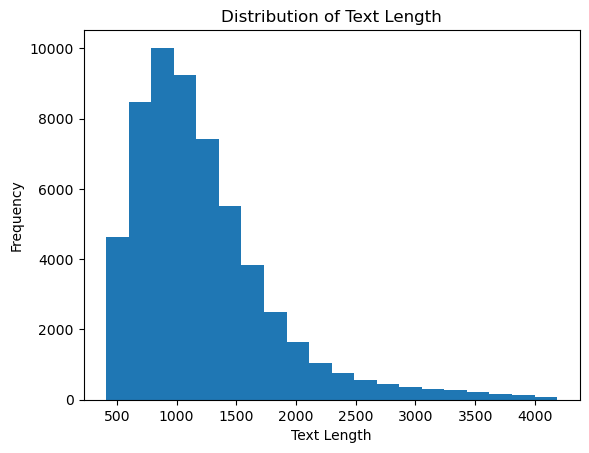

In [11]:
df['text_length'] = df['text'].str.len()
plt.hist(df['text_length'], bins=20)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

In [12]:
df = df.sample(5000).drop('link', axis=1).reset_index(drop=True)

## 9. Are there any outliers in the length of the 'text' column?

In [13]:
df['text_length_zscore'] = (df['text_length'] - df['text_length'].mean()) / df['text_length'].std()

# Define a threshold for identifying outliers (e.g., z-score > 3 or z-score < -3)
outlier_threshold = 3

# Identify potential outliers
potential_outliers = df[(df['text_length_zscore'] > outlier_threshold) | (df['text_length_zscore'] < -outlier_threshold)]

# Print the potential outliers
if len(potential_outliers) > 0:
    print("Potential outliers in the length of the 'text' column:")
    print(potential_outliers)
else:
    print("No outliers found in the length of the 'text' column.")

Potential outliers in the length of the 'text' column:
                artist                            song  \
14                 Yes    The Revealing Science Of God   
26               Drake               Over My Dead Body   
34         Celine Dion  It's All Coming Back To Me Now   
44         Nicki Minaj                Ain't Gone Do It   
52         Vanilla Ice                    It's A Party   
...                ...                             ...   
4877       Vanilla Ice                   Hip Hop Rules   
4917             Usher       That's What It's Made For   
4922  Townes Van Zandt             Billy, Boney And Ma   
4923        Jason Mraz                Geek In The Pink   
4926         LL Cool J                         Jealous   

                                                   text  text_length  \
14    Dawn of light lying between a silence and sold...         4020   
26    How I'm feeling, it doesn't matter  \r\n'Cause...         3109   
34    There were nights when the

## 10. What are the average lengths of song titles?

In [14]:
df['text_length'].mean()

1217.2384

## 11. What are the minimum lengths of song titles?

In [15]:
df['text_length'].min()

411

## 12. What are the maximum lengths of song titles?

In [16]:
df['text_length'].max()

4121

## 13. Are there any correlations between the lengths of song titles and artist names?

In [17]:
df['title_length'] = df['song'].str.len()
df['artist_length'] = df['artist'].str.len()
correlation = df['title_length'].corr(df['artist_length'])
print(correlation)

0.07453885046562914


## 14. How many songs does each artist have on average?

In [18]:
songs_per_artist = df.groupby('artist').size()
average_songs_per_artist = songs_per_artist.mean()
print("Average number of songs per artist:", average_songs_per_artist)

Average number of songs per artist: 8.305647840531561


## Data Visualization

## Bar plot of the top 10 artists


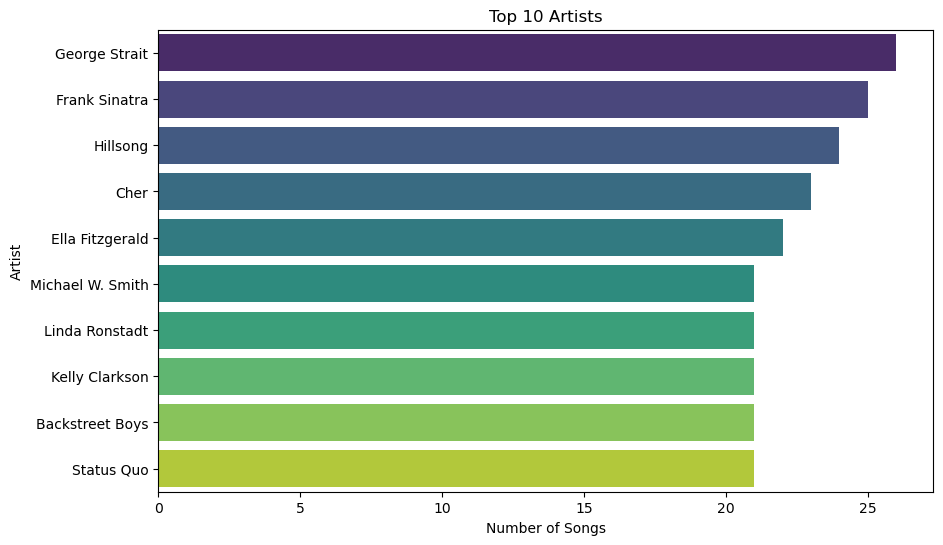

In [19]:
top_artists = df['artist'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

##  Pie chart of the distribution of songs by artist


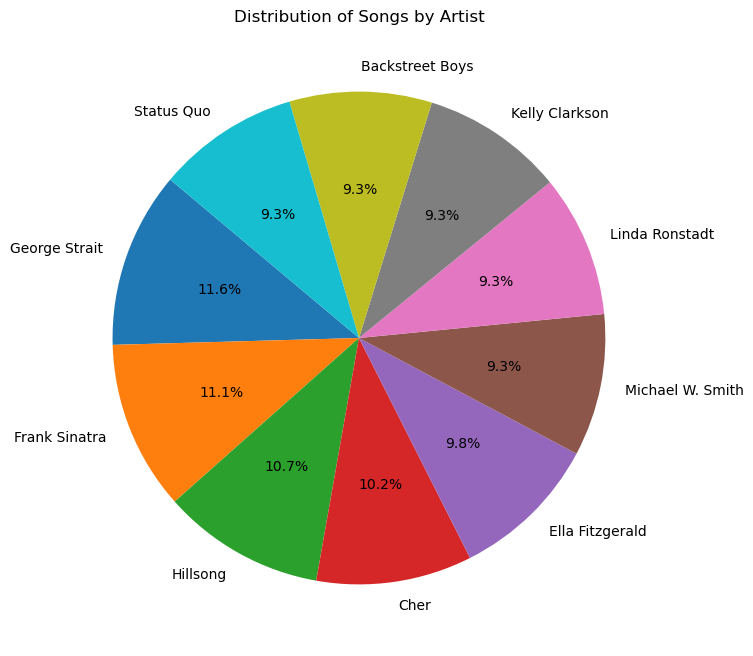

In [20]:
plt.figure(figsize=(8, 8))
df['artist'].value_counts().head(10).plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Songs by Artist')
plt.ylabel('')
plt.show()

## Word cloud of song titles


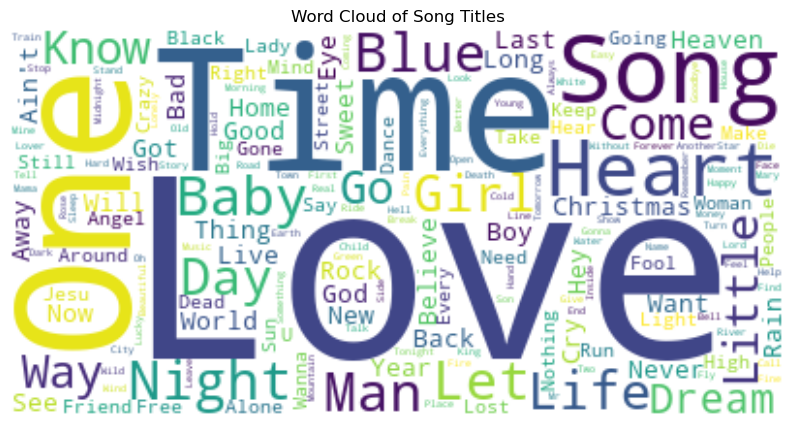

In [21]:
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(background_color='white').generate(' '.join(df['song']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Song Titles')
plt.axis('off')
plt.show()

## Distribution of song lengths


C:\Users\Mohamed\.conda\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


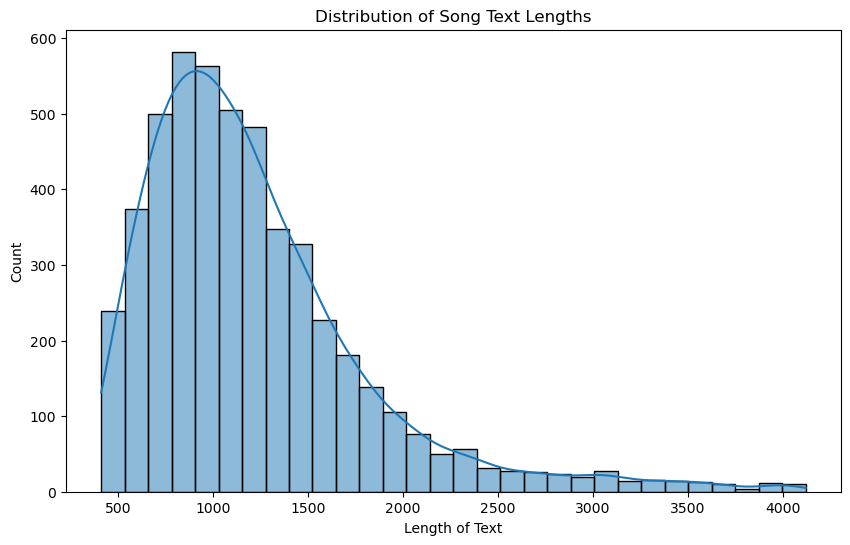

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text'].str.len(), bins=30, kde=True)
plt.title('Distribution of Song Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Count')
plt.show()


## Scatter plot of song lengths by artist


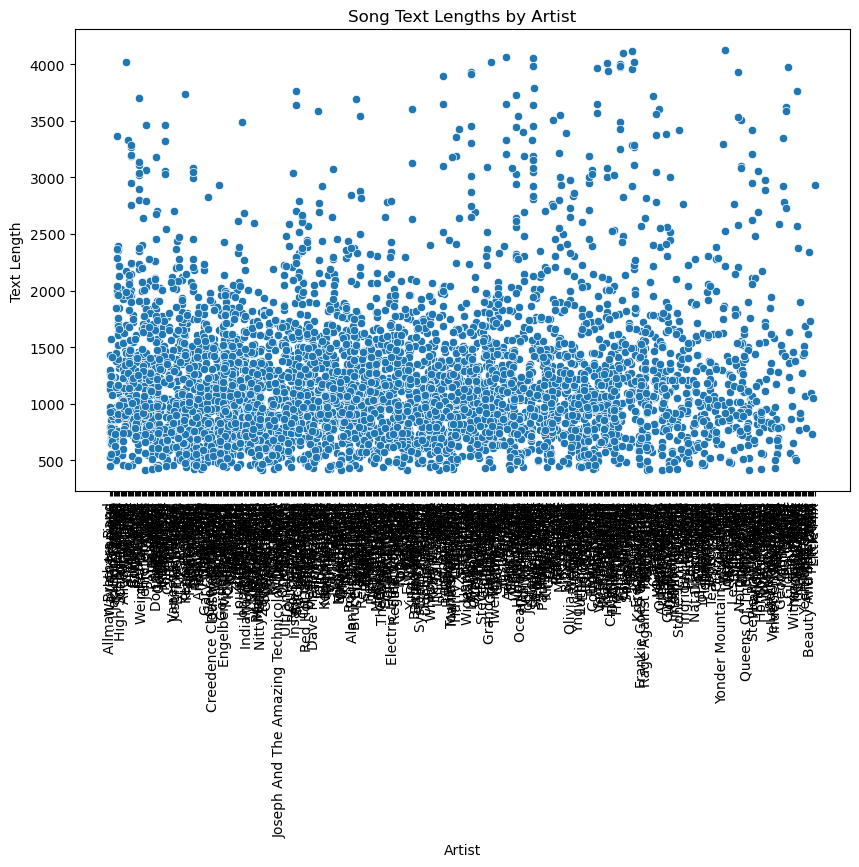

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['artist'], y=df['text'].str.len())
plt.title('Song Text Lengths by Artist')
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Text Length')
plt.show()


##  Box plot of song lengths by artist


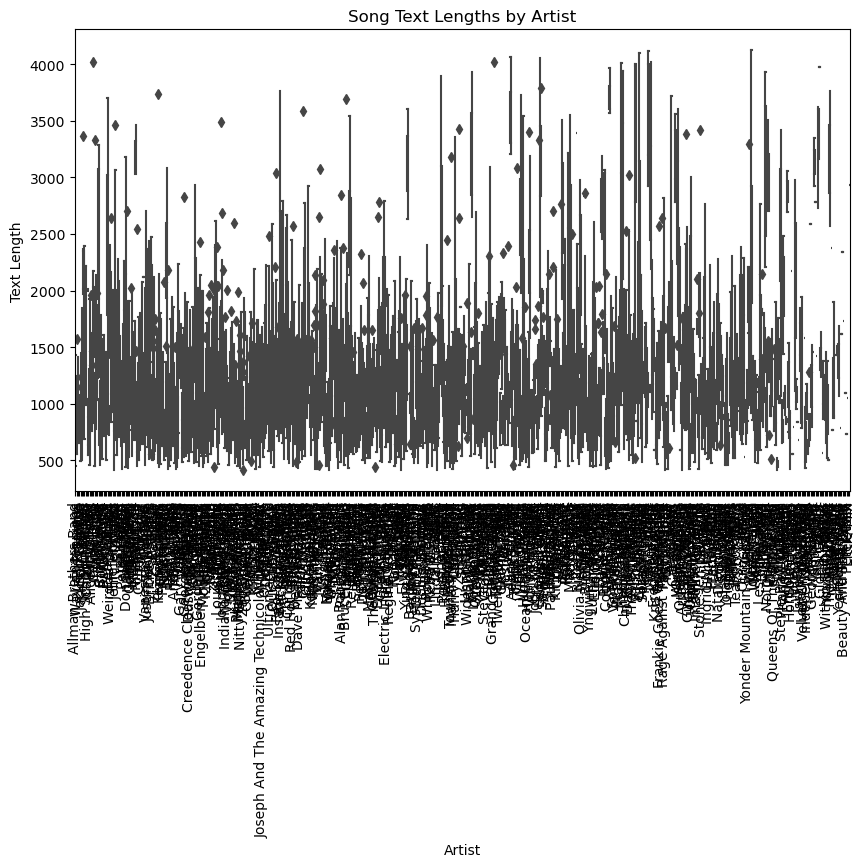

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['artist'], y=df['text'].str.len())
plt.title('Song Text Lengths by Artist')
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Text Length')
plt.show()


## Count plot of the number of songs per artist


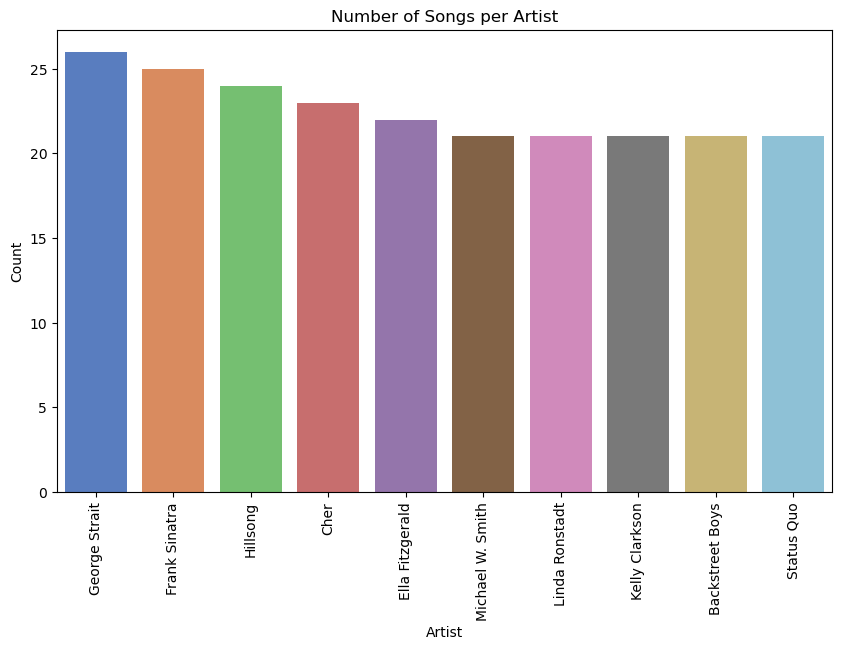

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='artist', data=df, order=df['artist'].value_counts().index[:10], palette='muted')
plt.title('Number of Songs per Artist')
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Count')
plt.show()

## Violin plot of song lengths by artist


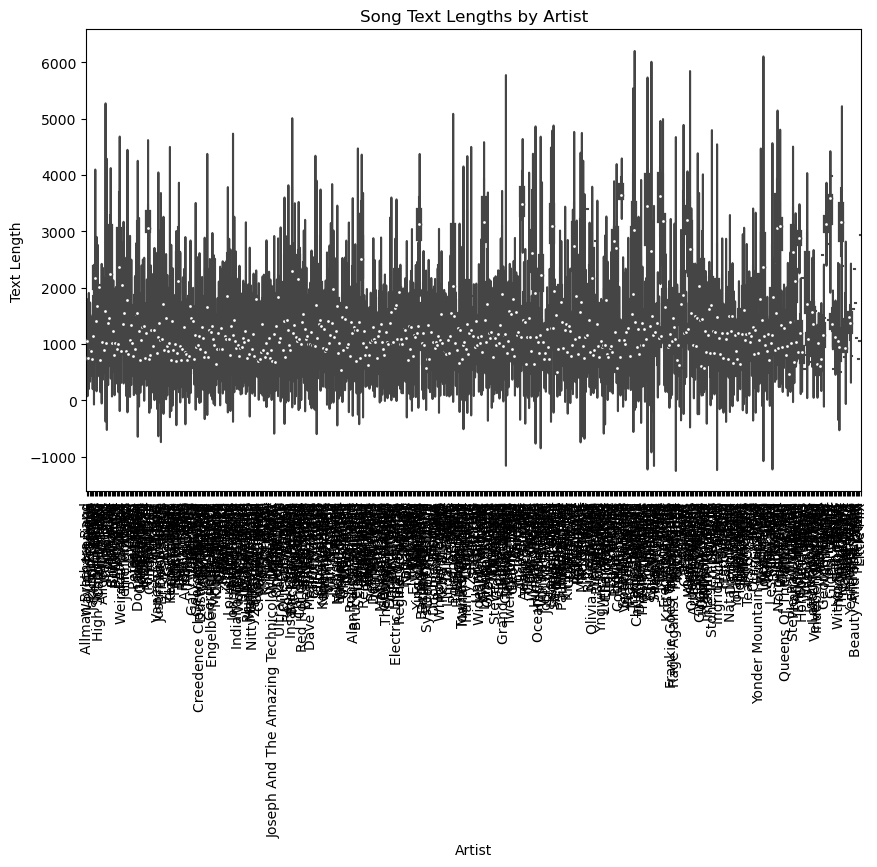

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['artist'], y=df['text'].str.len())
plt.title('Song Text Lengths by Artist')
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Text Length')
plt.show()


## Kernel density estimate plot of song lengths


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_23948\2072474388.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['text'].str.len(), shade=True)
C:\Users\Mohamed\.conda\envs\mohamed\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


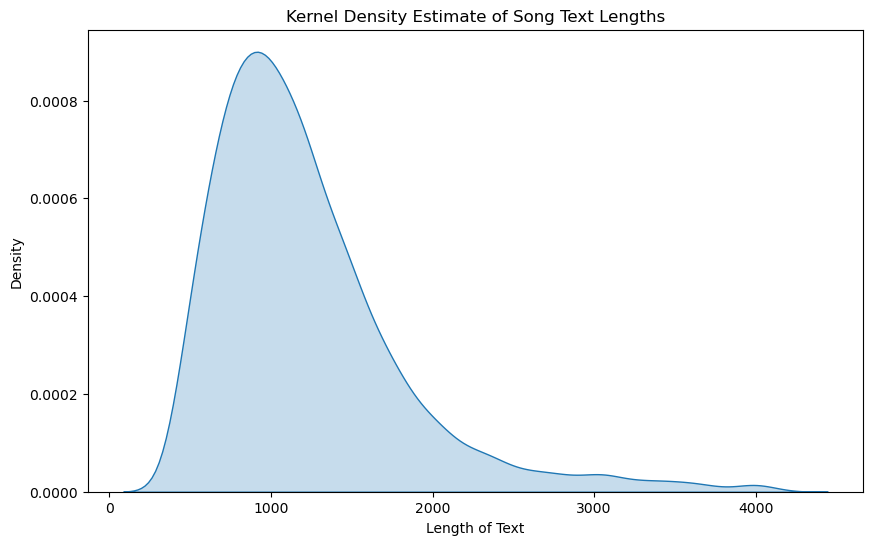

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['text'].str.len(), shade=True)
plt.title('Kernel Density Estimate of Song Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Density')
plt.show()

In [28]:
df

,artist,song,text,text_length,text_length_zscore,title_length,artist_length
0,Allman Brothers Band,Ain't No Good To Cry,Hear a new girl moved to the town \r\nNow you...,1139,-0.131425,20,20
1,Waylon Jennings,In This Very Same Room,That's the very same door that I carried her t...,760,-0.768068,22,15
2,Extreme,When I First Kissed You,New york city can be so pretty \r\n]from a bi...,735,-0.810063,23,7
3,Erik Santos,All That I Need,I'm sorry that I hurt you \r\nI took for gran...,902,-0.529537,15,11
4,Eric Clapton,Got You On My Mind,"I've got you on my mind, I'm feeling kind of s...",1151,-0.111267,18,12
...,...,...,...,...,...,...,...
4995,Alphaville,Welcome To The Sun,It's the start of the season \r\nThe dawning ...,1010,-0.348119,18,10
4996,Bing Crosby,"Put It There, Pal",I don't care where I'm going \r\nJust as long...,1805,0.987321,17,11
4997,Bonnie Raitt,I Believe I'm In Love With You.,I don't know what's wrong with me \r\nI've be...,784,-0.727753,31,12
4998,Foo Fighters,Overdrive,Every now I'm running out \r\nThis time I thi...,1496,0.468263,9,12


In [29]:
df['text'][0]

"Hear a new girl moved to the town  \r\nNow your baby just ain't no where to be found  \r\nNow you think you're in dispair - no  \r\nYou feel that chill - that cold black clinging in the air  \r\n  \r\nLove's a game - you're in it  \r\nAnd you're so proud  \r\nSomeone you can depend on  \r\nSomeone you can rely on  \r\nNo matter what you say  \r\nYou won't come  \r\nRunning back to you're arms  \r\nIt's all over baby  \r\nWell it don't do no good to cry  \r\n  \r\nHow do think I felt when you  \r\nLet me stay here never once said that we're through  \r\nYou didn't fight it all the way, no  \r\nBut I don't care - you just don't mean that much to me this way  \r\n  \r\nLove's a game - you're in it  \r\nAnd you're so proud  \r\nSomeone you can depend on  \r\nSomeone you can rely on  \r\nNo matter what you say  \r\nYou won't come  \r\nRunning back to you're arms  \r\nIt's all over baby  \r\nWell it don't do no good to cry  \r\n  \r\n[solo]  \r\n  \r\nLove's a game - you're in it  \r\nAnd y

In [30]:
df.shape

(5000, 7)

In [31]:
df.tail()

,artist,song,text,text_length,text_length_zscore,title_length,artist_length
4995,Alphaville,Welcome To The Sun,It's the start of the season \r\nThe dawning ...,1010,-0.348119,18,10
4996,Bing Crosby,"Put It There, Pal",I don't care where I'm going \r\nJust as long...,1805,0.987321,17,11
4997,Bonnie Raitt,I Believe I'm In Love With You.,I don't know what's wrong with me \r\nI've be...,784,-0.727753,31,12
4998,Foo Fighters,Overdrive,Every now I'm running out \r\nThis time I thi...,1496,0.468263,9,12
4999,Ella Fitzgerald,Everything But You,"You left me a horse from Texas, \r\nA house w...",1120,-0.163341,18,15


## Text Cleaning

In [32]:
df['text'] = df['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex=True)

In [33]:
stemmer = PorterStemmer()

In [34]:
def token(txt):
    token = nltk.word_tokenize(txt)
    a = [stemmer.stem(w) for w in token]
    return " ".join(a)

In [35]:
token("you are beautiful, beauty")

'you are beauti , beauti'

In [36]:
df['text'].apply(lambda x: token(x))

0       hear a new girl move to the town now your babi...
1       that 's the veri same door that i carri her th...
2       new york citi can be so pretti ] from a bird '...
3       i 'm sorri that i hurt you i took for grant al...
4       i 've got you on my mind , i 'm feel kind of s...
                              ...                        
4995    it 's the start of the season the dawn is near...
4996    i do n't care where i 'm go just as long as i ...
4997    i do n't know what 's wrong with me i 've been...
4998    everi now i 'm run out thi time i think i 'm b...
4999    you left me a hors from texa , a hous with ins...
Name: text, Length: 5000, dtype: object

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

In [39]:
matrix = tfidf.fit_transform(df['text'])

In [40]:
similar = cosine_similarity(matrix)

In [41]:
similar[0]

array([1.        , 0.01005949, 0.00880097, ..., 0.20215816, 0.03080825,
       0.        ])

In [43]:
df[df['song'] == "Welcome To The Sun"].index[0]

4995

## Recommender Function

In [44]:
def recommender(song_name):
    idx = df[df['song'] == song_name].index[0]
    distance = sorted(list(enumerate(similar[idx])), reverse=True, key=lambda x:x[1])
    song = []
    for s_id in distance[1:21]:
        song.append(df.iloc[s_id[0]].song)
    return song
    

In [45]:
recommender("Welcome To The Sun")

['Out Of Season',
 "Captain Jim's Drunken Dream",
 'Welcome To Hell',
 'Power To The People',
 'Summer Boy',
 'Never Get Around To It',
 'Tiger',
 'All The Magic',
 'Fine',
 "David's Song",
 'Dancing In The Dark',
 'Breaktown',
 'The Dirty Jobs',
 "Til' Summer Comes Around",
 'The Boys Of Summer',
 'Sweet Is The Night',
 'My Share Of The Sidewalk',
 'Saturday Sun',
 "I Don't Know Why",
 'Here Comes The Summer']

In [46]:
import joblib

In [47]:
joblib.dump(similar, "similarity.pkl")

['similarity.pkl']

In [48]:
joblib.dump(df, "df.pkl")

['df.pkl']

In [49]:
%%writefile app.py
import pandas as pd  
import streamlit as st 
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import joblib



CLIENT_ID = "a1741358c92f4c74bb07b17ac5bd71a4"
CLIENT_SECRET = "38a0be401fbb402180b96691daed7e3c"

client_credentials_manger = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manger)

def get_song_album_cover_url(song_name, artist_name):
    search_query = f"track:{song_name} artist:{artist_name}"
    results = sp.search(q=search_query, type="track")

    if results and results["tracks"]["items"]:
        track = results["tracks"]["items"][0]
        album_cover_url = track["album"]["images"][0]["url"]
        print(album_cover_url)
        return album_cover_url
    else:
        return "https://i.postimg.cc/0QNxYz4V/social.png"
    
def recommend(song):
    index = music[music['song'] == song].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x: x[1])
    recommended_music_names = []
    recommended_music_posters = []
    for i in distances[1:6]:
        artist = music.iloc[i[0]].artist
        print(artist)
        print(music.iloc[i[0]].song)
        recommended_music_posters.append(get_song_album_cover_url(music.iloc[i[0]].song, artist))
        recommended_music_names.append(music.iloc[i[0]].song)

    return recommended_music_names, recommended_music_posters
    
st.header("Music Recommendation System")
music = joblib.load('df.pkl')
similarity = joblib.load('similarity.pkl')
    
movie_list = music['song'].values
selected_movie = st.selectbox("Select a song from the dropdown", movie_list)
    
if st.button('Show Recommendation'):
    recommended_music_names,recommended_music_posters = recommend(selected_movie)
    col1, col2, col3, col4, col5 = st.columns(5)
    with col1:
        st.text(recommended_music_names[0])
        st.image(recommended_music_posters[0])
    with col2:
        st.text(recommended_music_names[1])
        st.image(recommended_music_posters[1])
    with col3:
        st.text(recommended_music_names[2])
        st.image(recommended_music_posters[2])
    with col4:
        st.text(recommended_music_names[3])
        st.image(recommended_music_posters[3])
    with col5:
        st.text(recommended_music_names[4])
        st.image(recommended_music_posters[4])



Overwriting app.py


In [ ]:
! streamlit run app.py